In [1]:
import pandas as pd
path = '../../train.csv'
df = pd.read_csv(path)

In [7]:
df['label'] = pd.Categorical(df['label'])
df['label_code'] = df['label'].cat.codes

In [8]:
df.head()

,Unnamed: 0,claim,label,evidence_title,evidence_sentence,label_code
0,0,Nikolaj Coster-Waldau worked with the Fox Broa...,SUPPORTS,Fox_Broadcasting_Company,The Fox Broadcasting Company -LRB- often short...,1
1,1,Nikolaj Coster-Waldau worked with the Fox Broa...,SUPPORTS,Nikolaj_Coster-Waldau,He then played Detective John Amsterdam in the...,1
2,2,Roman Atwood is a content creator.,SUPPORTS,Roman_Atwood,"He is best known for his vlogs , where he post...",1
3,3,Roman Atwood is a content creator.,SUPPORTS,Roman_Atwood,He also has another YouTube channel called `` ...,1
4,4,"History of art includes architecture, dance, s...",SUPPORTS,History_of_art,The subsequent expansion of the list of princi...,1


## Dealing with Length

The length of documents can greatly affect the results of a model.
+ Naive Bayes - when training the model, the classes

In [24]:
# Dealing with Length
docs = df['evidence_sentence']
df['ev_sent_length'] = docs.apply(lambda x: len(x.split()))

[]

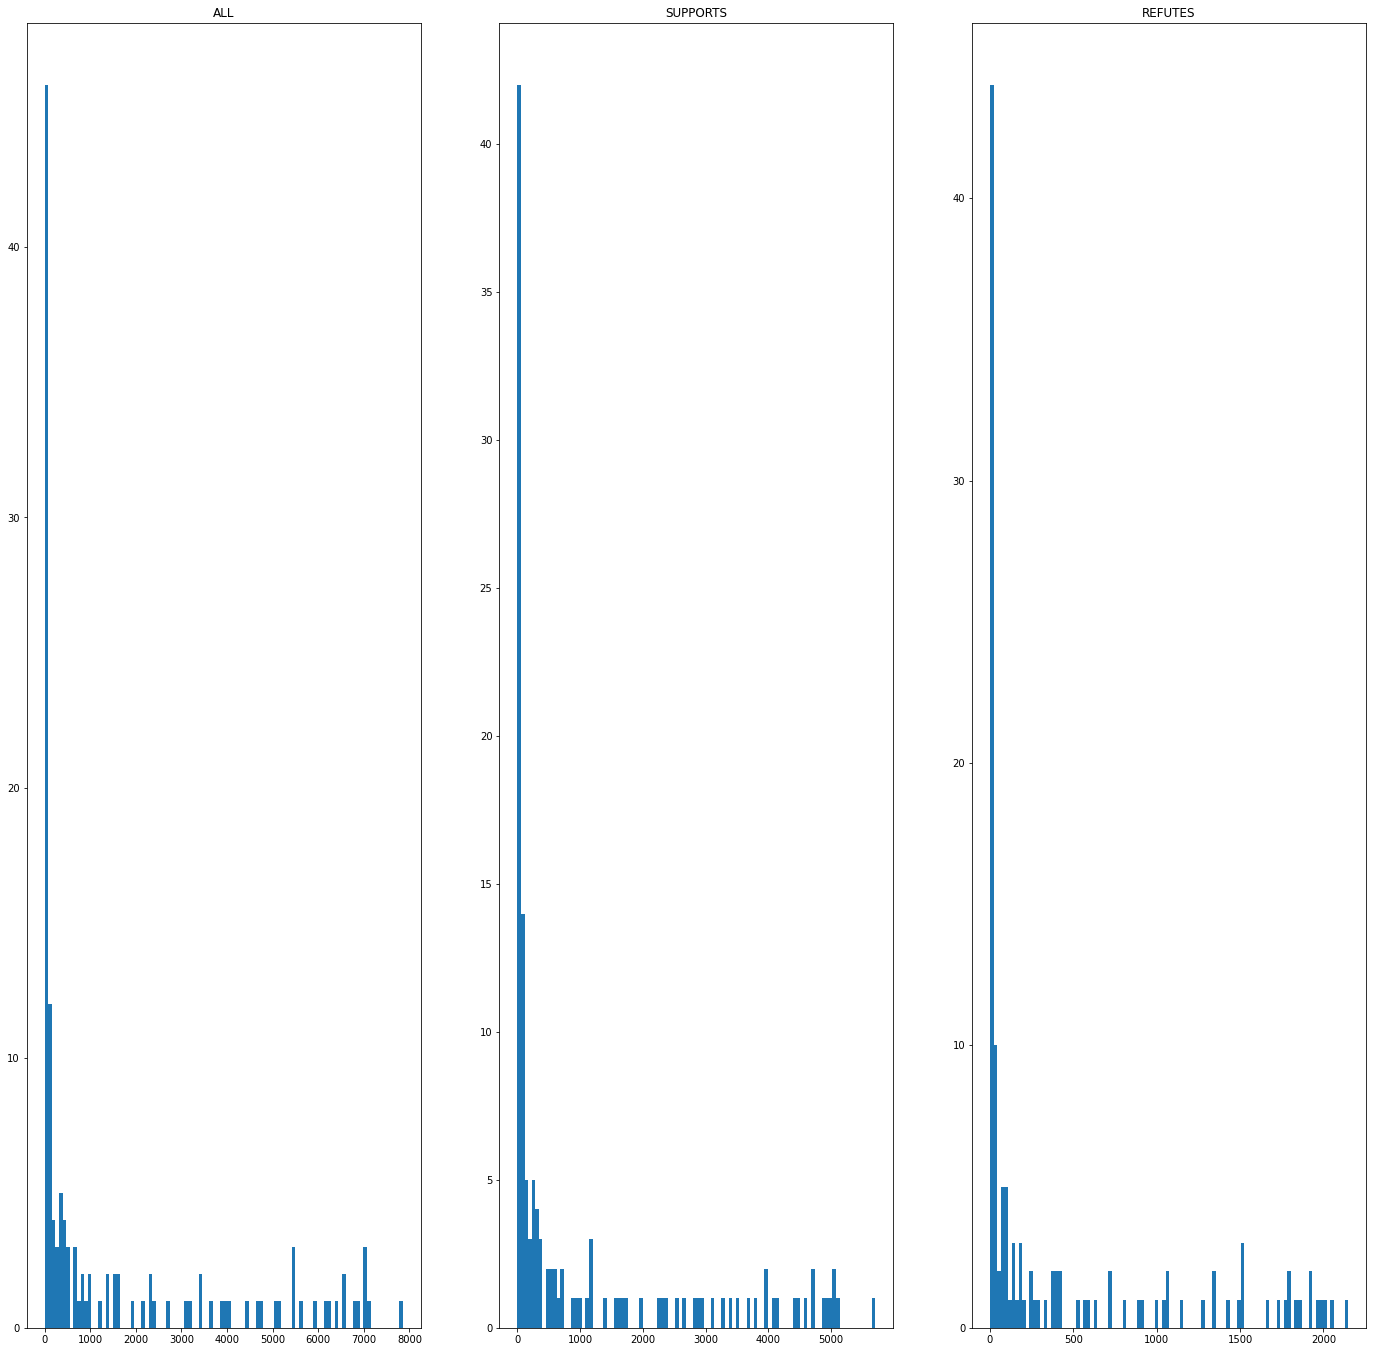

In [34]:
df[df['label'].str.contains('SUPPORTS') == True]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 24))
ax[0].hist(df['ev_sent_length'].value_counts(), bins=100)
ax[0].set_title("ALL")
ax[1].hist(df[df['label'].str.contains('SUPPORT')]['ev_sent_length'].value_counts(), bins=100)
ax[1].set_title("SUPPORTS")
ax[2].hist(df[df['label'].str.contains('REFUTE')]['ev_sent_length'].value_counts(), bins=100)
ax[2].set_title("REFUTES")
plt.plot()

## Naive Bayes

In [40]:
# 1. get the counts for each word for each class
# 2. get the probabilties of each word for each class

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33)

train.shape, test.shape

((135717, 7), (66846, 7))

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer()
counts = c_vect.fit_transform(train['evidence_sentence'])
counts.shape

(135717, 39927)

In [42]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1)
mnb.fit(X=counts, y=train['label_code'])

MultinomialNB(alpha=1)

In [ ]:
mnb.predict( )

In [28]:
df.head()

,Unnamed: 0,claim,label,evidence_title,evidence_sentence,label_code,ev_sent_length
0,0,Nikolaj Coster-Waldau worked with the Fox Broa...,SUPPORTS,Fox_Broadcasting_Company,The Fox Broadcasting Company -LRB- often short...,1,37
1,1,Nikolaj Coster-Waldau worked with the Fox Broa...,SUPPORTS,Nikolaj_Coster-Waldau,He then played Detective John Amsterdam in the...,1,39
2,2,Roman Atwood is a content creator.,SUPPORTS,Roman_Atwood,"He is best known for his vlogs , where he post...",1,20
3,3,Roman Atwood is a content creator.,SUPPORTS,Roman_Atwood,He also has another YouTube channel called `` ...,1,16
4,4,"History of art includes architecture, dance, s...",SUPPORTS,History_of_art,The subsequent expansion of the list of princi...,1,61
